In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Sreemanto/DSP-55/main/Premier_League_Table.csv')

### predict the rank of team depending on goal difference (diff in GF:goals made and GA:goals conceded)

In [3]:
df.head()

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996


In [4]:
df.shape

(500, 13)

In [20]:
df.isnull().sum()

Rk                 0
Squad              0
MP                 0
W                  0
D                  0
L                  0
GF                 0
GA                 0
Pts                0
Attendance         0
Top Team Scorer    0
Goalkeeper         0
Year               0
GD                 0
predicted_rank     0
dtype: int64

In [5]:
#ceating a new column GD: goal difference

df['GD'] = df['GF'] - df['GA']
df['GD']

0      38
1      29
2      36
3      17
4      17
       ..
495   -13
496   -26
497   -25
498   -28
499   -49
Name: GD, Length: 500, dtype: int64

In [6]:
from sklearn.linear_model import LinearRegression

df_model = LinearRegression()

In [25]:
df.dtypes

Rk                  int64
Squad              object
MP                  int64
W                   int64
D                   int64
L                   int64
GF                  int64
GA                  int64
Pts                 int64
Attendance          int64
Top Team Scorer    object
Goalkeeper         object
Year                int64
GD                  int64
dtype: object

In [7]:
GD = np.array(df['GD'])
GD

array([ 38,  29,  36,  17,  17,  20,  14,  12,  -4,  -9,   2, -15, -17,
       -15, -13, -18, -18, -25, -19, -32,  32,  33,  30,  25,  13,   3,
        -1,   3,  -8,  -7, -10, -13,  -1,  -9, -13,  -6, -16, -18,  -9,
       -28,  35,  47,  26,  28,  11,   5,   1,  -1,   3,  10,   2,  -5,
        -9, -12, -12, -15, -15, -20, -45, -34,  43,  42,  27,  28,  -7,
         5,  19,  -5,  -6,  -6,  -3,  -1,  -6,  -5, -12, -23, -27, -15,
       -14, -34,  52,  30,  15,  21,  19,  11,   1,   0,  -1,   8,   9,
        -6,  10,  -7, -17, -13, -30, -28, -32, -42,  48,  25,  32,  21,
        15,  23,   5,   3,  -7,  -8,  -6,  -7, -12,   0,  -5, -14, -22,
       -24, -27, -40,  43,  37,  42,  22,  16,  28,  -9,  -1,  -4,   4,
        -8, -12,  -8, -11, -12, -18, -22, -23, -30, -34,  40,  43,  15,
        30,  20,   9,  -1,  -3,  -7, -11,   4, -11,  -8,  -9,   1,  -5,
       -10, -17, -36, -44,  47,  37,  29,  18,  12,   4,   0,  -8,   6,
        -5,  -8,  -1,  -7, -10,  -8,   1, -12, -17, -39, -39,  5

In [8]:
GD = GD.reshape(500, 1)
GD

array([[ 38],
       [ 29],
       [ 36],
       [ 17],
       [ 17],
       [ 20],
       [ 14],
       [ 12],
       [ -4],
       [ -9],
       [  2],
       [-15],
       [-17],
       [-15],
       [-13],
       [-18],
       [-18],
       [-25],
       [-19],
       [-32],
       [ 32],
       [ 33],
       [ 30],
       [ 25],
       [ 13],
       [  3],
       [ -1],
       [  3],
       [ -8],
       [ -7],
       [-10],
       [-13],
       [ -1],
       [ -9],
       [-13],
       [ -6],
       [-16],
       [-18],
       [ -9],
       [-28],
       [ 35],
       [ 47],
       [ 26],
       [ 28],
       [ 11],
       [  5],
       [  1],
       [ -1],
       [  3],
       [ 10],
       [  2],
       [ -5],
       [ -9],
       [-12],
       [-12],
       [-15],
       [-15],
       [-20],
       [-45],
       [-34],
       [ 43],
       [ 42],
       [ 27],
       [ 28],
       [ -7],
       [  5],
       [ 19],
       [ -5],
       [ -6],
       [ -6],
       [ -3],
      

In [9]:
df_model.fit(GD, df['Rk'])

LinearRegression()

In [35]:
df_model.score(GD, df['Rk'])

0.8384102509297338

In [10]:
intercept = df_model.intercept_
slope     = df_model.coef_

print(intercept)
print(slope)

10.5
[-0.21341188]


In [11]:
#predict the rank of team which has goal difference 15

predicted_rank = intercept + slope * GD

df['predicted_rank'] = predicted_rank
df

,Rk,Squad,MP,W,D,L,GF,GA,Pts,Attendance,Top Team Scorer,Goalkeeper,Year,GD,predicted_rank
0,1,Manchester Utd,38,25,7,6,73,35,82,41001,Eric Cantona - 14,Peter Schmeichel,1996,38,2.390348
1,2,Newcastle Utd,38,24,6,8,66,37,78,36501,Les Ferdinand - 25,Shaka Hislop,1996,29,4.311055
2,3,Liverpool,38,20,11,7,70,34,71,39553,Robbie Fowler - 28,David James,1996,36,2.817172
3,4,Aston Villa,38,18,9,11,52,35,63,37492,Dwight Yorke - 17,Mark Bosnich,1996,17,6.871998
4,5,Arsenal,38,17,12,9,49,32,63,32614,Ian Wright - 15,David Seaman,1996,17,6.871998
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,16,West Ham,38,10,9,19,49,62,39,44155,Michail Antonio - 10,Łukasz Fabiański,2020,-13,13.274355
496,17,Aston Villa,38,9,8,21,41,67,35,28505,Jack Grealish - 8,Tom Heaton,2020,-26,16.048709
497,18,Bournemouth,38,9,7,22,40,65,34,7745,Callum Wilson - 8,Aaron Ramsdale,2020,-25,15.835297
498,19,Watford,38,8,10,20,36,64,34,15353,Troy Deeney - 10,Ben Foster,2020,-28,16.475533


In [19]:
df[df['GD'] == 15]['predicted_rank']

#7 is the predicted rank of teams having GD 15

82     7.298822
104    7.298822
142    7.298822
204    7.298822
305    7.298822
345    7.298822
483    7.298822
Name: predicted_rank, dtype: float64

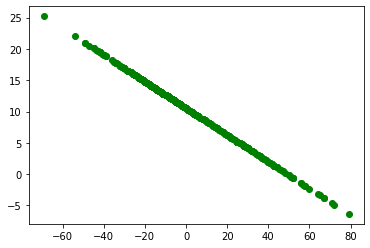

In [56]:
import matplotlib.pyplot as plt

plt.scatter(GD, df['predicted_rank'], c = 'green')
plt.show()

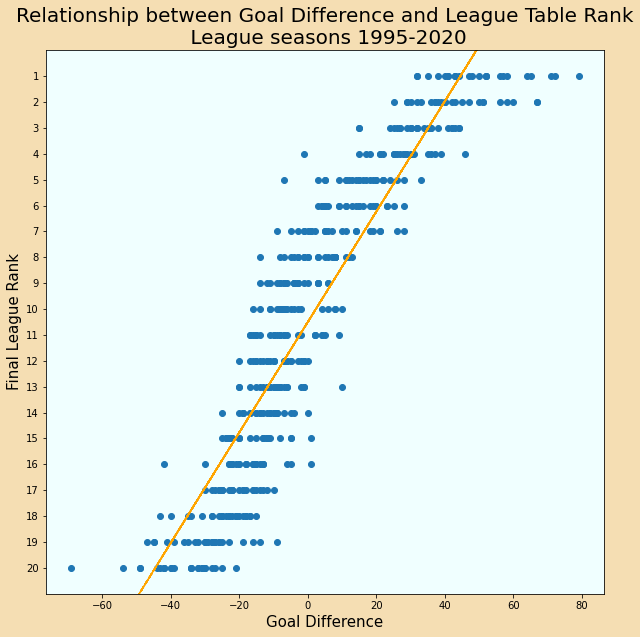

In [66]:
# First object fig, short for figure, imagine it as the frame of your plot.
# you can resize, reshape the frame but you cannot draw on it.

#setting the outline of plot
fig, ax = plt.subplots(figsize = (10,10))
fig.set_facecolor('wheat')
ax.patch.set_facecolor('azure')

#plot data

plt.scatter(GD, df['Rk'])

plt.plot(GD, predicted_rank , c='orange', linestyle = '--')

plt.ylim(0,21)              # we want to have a specified limit for the range of y value i.e from 0 - 21

plt.gca().invert_yaxis()    # we want rank 1 to be on top

plt.yticks(np.arange(1,21)) #fixing the point axis (makes rank in integer)

plt.xlabel('Goal Difference', fontsize = 15)
plt.ylabel('Final League Rank', fontsize = 15)
plt.title('Relationship between Goal Difference and League Table Rank\n League seasons 1995-2020', fontsize = 20)

plt.show()

### Training and Testing our data

In [82]:
#for years 1995-2019

y_train = df[df['Year'] != 2020].Rk
x_train = df[df['Year'] != 2020].GD.values.reshape(-1, 1)

In [83]:
#for year 2020

y_test = df[df['Year'] == 2020].Rk
x_test = df[df['Year'] == 2020].GD.values.reshape(-1,1)

In [84]:
new_model = LinearRegression()
new_model.fit(x_train, y_train)

LinearRegression()

In [85]:
#we can use predict function to generate predicted values

y_pred = new_model.predict(x_test)
y_pred[:5]

array([-0.64714946, -3.86267334,  4.06895223,  7.28447612,  4.92642527])

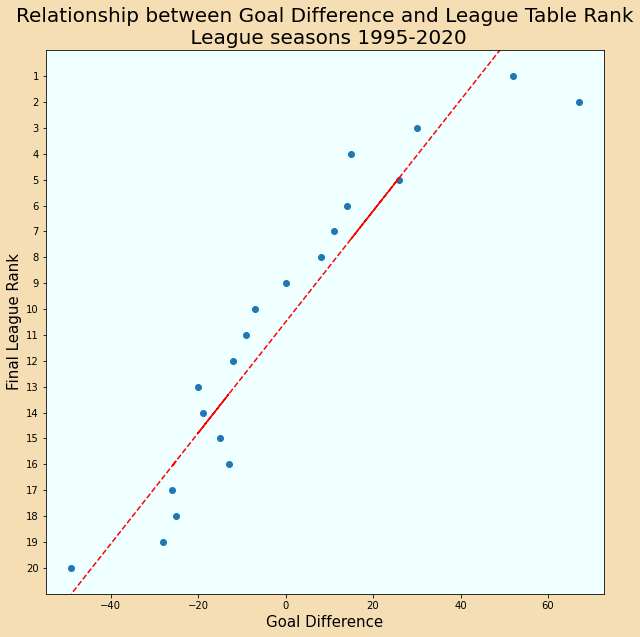

In [86]:
#setting the outline of plot
fig, ax = plt.subplots(figsize = (10,10))
fig.set_facecolor('wheat')
ax.patch.set_facecolor('azure')

#plot data

plt.scatter(x_test, y_test)

plt.plot(x_test, y_pred , c='red', linestyle = '--')

plt.ylim(0,21)              # we want to have a specified limit for the range of y value i.e from 0 - 21

plt.gca().invert_yaxis()    # we want rank 1 to be on top

plt.yticks(np.arange(1,21)) #fixing the point axis (makes rank in integer)

plt.xlabel('Goal Difference', fontsize = 15)
plt.ylabel('Final League Rank', fontsize = 15)
plt.title('Relationship between Goal Difference and League Table Rank\n League seasons 1995-2020', fontsize = 20)

plt.show()